<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [3]:
from matplotlib.colors import ListedColormap
import  matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                  alpha=0.8, c=colors[idx],
                  marker=markers[idx], label=cl,
                  edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
lore=LogisticRegression(C=100.0,random_state=1, solver='lbfgs',multi_class='multinomial')
lore.fit(X_train_std,y_train)

LogisticRegression(C=100.0, multi_class='multinomial', random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


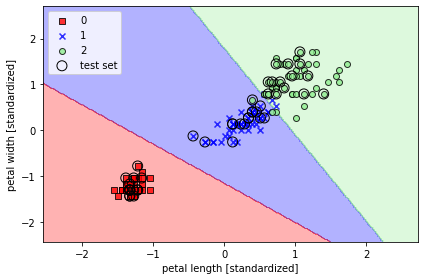

In [6]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined_std=np.hstack((y_train,y_test))
plot_decision_regions(X_combined_std,y_combined_std,lore,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
lore.classes_

array([0, 1, 2])

In [8]:
lore.coef_

array([[-6.93265988, -5.76495748],
       [-2.03192177, -0.03413691],
       [ 8.96458165,  5.79909439]])

In [9]:
l=X_test_std[0,:].reshape(1,-1)
l

array([[0.89820289, 1.44587881]])

In [10]:
m=X_test_std[:3,:]

In [11]:
lore.predict_proba(l)

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01]])

In [12]:
y_test[:3]

array([2, 0, 0])

In [13]:
lore.predict(m)

array([2, 0, 0])

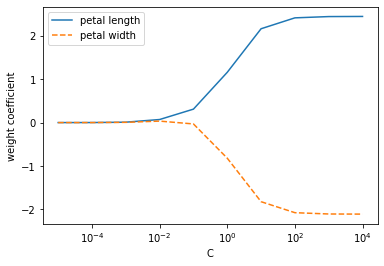

In [17]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


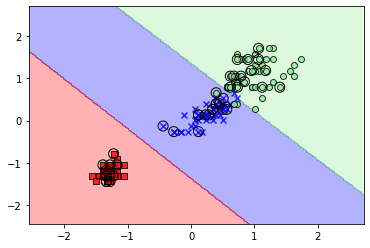

In [19]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined_std,svm,test_idx=range(105,150))

In [22]:
m=svm.support_vectors_

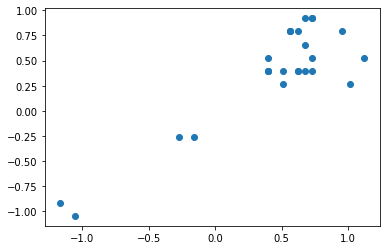

In [23]:
plt.scatter(m[:,0],m[:,1])

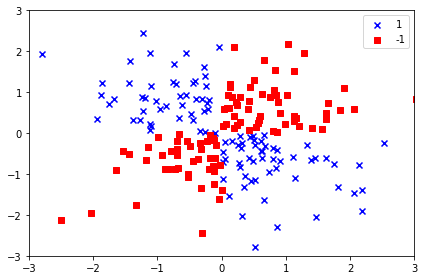

In [25]:
#Solving non-linear problems using a kernel SVM
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

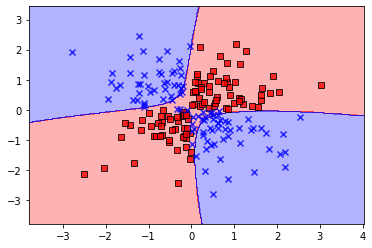

In [28]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=10.0,gamma=0.1,random_state=1)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


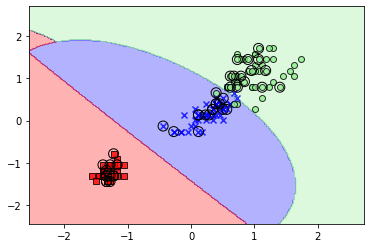

In [29]:
svm=SVC(kernel='rbf',C=10.0,gamma=0.2,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined_std,svm,test_idx=range(105,150))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


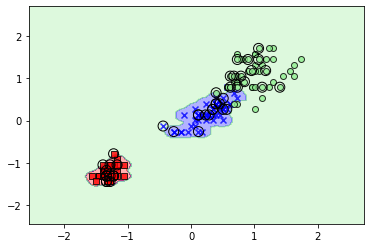

In [30]:
svm=SVC(kernel='rbf',C=10.0,gamma=100,random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined_std,svm,test_idx=range(105,150))